In [2]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
Climate_df=pd.read_csv("Climate_dictionary.csv")
Group_dict_df = pd.read_csv("Groups_dictionary.csv")
dataset_df = pd.read_csv("Final_clean_dataSet.csv")
full_df = pd.read_csv("Final_clean_Loc_df.csv")
Stones_Grouped_df = pd.read_csv("Groups_dictionary.csv")
Stones_appear = pd.read_csv("Stones_Appearence.csv")


Climate_df.drop(["Unnamed: 0"],axis=1,inplace=True)
Group_dict_df.drop(["Unnamed: 0"],axis=1,inplace=True)
dataset_df.drop(["Unnamed: 0"],axis=1,inplace=True)
full_df.drop(["Unnamed: 0"],axis=1,inplace=True)
Stones_Grouped_df.drop(["Unnamed: 0"],axis=1,inplace=True)
Stones_appear.drop(["Unnamed: 0"],axis=1,inplace=True)

In [8]:
dataset_df.head()

,Climate,Latitude,Longitude,Ag,Al,As,Au,B,Ba,Be,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,15,31.261220,35.214581,1,1,0,0,1,1,0,...,1,0,1,1,0,1,0,1,1,7
1,15,32.620121,35.014771,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,15,31.795924,35.211981,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,7
3,15,32.607559,35.289086,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,7,31.261220,35.214581,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,7


In [13]:
full_df.head()

,Location URL,Stone Refernced,Minerals Recorded,Location Name,Rock Types,Climate,Decimal Coordinates,Minerals,Latitude,Longitude,...,Ti,Tl,U,V,W,Y,Yb,Zn,Zr,Group_Label
0,https://www.mindat.org/loc-14762.html,Lapis Lazuli Unakite,Copper Gemstones,",i,Israel,Country,",Alkalibasalt Analcimite Basalt Basanite Brecci...,15,"31.2612199,35.214581",Ag Al B Ba C Ca Ce Cl Cr Cu F Fe Gd H K La Mg ...,31.261220,35.214581,...,1,0,1,1,0,1,0,1,1,7
1,https://www.mindat.org//loc-145486.html,Lapis Lazuli Unakite,NaN,", Israel,i,Central District (HaMerkaz District...",NaN,15,"32.620121002197266,35.0147705078125",NaN,32.620121,35.014771,...,0,0,0,0,0,0,0,0,0,7
2,https://www.mindat.org//loc-145489.html,Lapis Lazuli Unakite,Gemstones,", Israel,i,Haifa District,District, Israel,Cou...",Alkalibasalt Kimberlite Peridotite Pyroxenite ...,15,"31.7959242,35.2119808",Al B C Ca Cl Cr F Fe H K Mg N Na O P Si Sn Ti ...,31.795924,35.211981,...,1,0,0,1,0,0,0,0,1,7
3,https://www.mindat.org//loc-145488.html,Lapis Lazuli Unakite,NaN,", Israel,i,Jerusalem District,District, Israel...",NaN,15,"32.6075587,35.2890861",Al C Ca H O Si,32.607559,35.289086,...,0,0,0,0,0,0,0,0,0,7
4,https://www.mindat.org//loc-205351.html,Lapis Lazuli Unakite,NaN,", Israel,i,Northern District (HaZafon District...",Basalt Dolerite Melanocraticnephelinolite Neph...,7,"31.2612199,35.214581",Al C Ca Cl Fe H K Mg Mn Na Ni O Si Ti Zn,31.261220,35.214581,...,1,0,0,0,0,0,0,1,0,7


Climate Level meaning is in Climate_df.
Stones in every group is in Group_dict_df.
All of the features are categorical features.
Y column is the Group_Label. (For the supervised learning models)

In [409]:
# for col in dataset_df.columns:
#     corr = dataset_df["Group_Label"].corr(dataset_df[col])
#     print(col,": ",corr)

In [211]:
Country_df = pd.DataFrame(index=[1])

def create_countries_Df(Country_df, flag):
    for ind in full_df.index:
        iden_Con = full_df["Location Name"][ind].find("Country")
        Country = full_df["Location Name"][ind][iden_Con-15:iden_Con]
        if((str(full_df["Location Name"][ind]).find("Constituent"))!=-1 or (str(full_df["Location Name"][ind]).find("Continen"))!=-1):
            Country1 = (full_df["Location Name"][ind][iden_Con-30:iden_Con])
            if(Country1.find("Greenland")!=-1): Country=" Greenland"
            if(Country1.find("England")!=-1): Country = " England"
            if(Country1.find("Antarctica")!=-1): Country = " Antarctica"
        while(Country.find(',')!=-1):
            comma = Country.find(',')
            Country = Country[comma+1:-1]
            if(Country==' Ital'):
                Country = " Italy"
            if(Country==' Indi'):
                Country = " India"
            if(Country==' Brazi'):
                Country = " Brazil"
            if(Country==' US'):
                Country = " USA"
        if(Country==''):
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Czech")!=-1): Country = "Czech"
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Papua New Guinea")!=-1): Country = "Papua New Guinea"  
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Macedonia")!=-1): Country = "Macedonia"  
            if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Dominican Republic")!=-1): Country = "Dominican Republic"

               
        if(flag==0):
            if(str(Country)=="Continen"): 
                if(str(full_df["Location Name"][ind][iden_Con-30:iden_Con]).find("Antarctica")!=-1): Country = "Antarctica"
                else:print(Country)
            Country_df[Country] = 0
        else:
            Country_df[Country] = Country_df[Country] +1
    return Country_df
Country_df = create_countries_Df(Country_df, 0)
Country_df = create_countries_Df(Country_df, 1)

In [212]:
for col in Country_df.columns:
    if(Country_df[col][1]>20):
        print(col,"showes: ",Country_df[col][1],"times")
    else:
        Country_df.drop([col],axis=1,inplace=True)
Country_df = Country_df.T.sort_values([1], ascending=False)

 Austria showes:  84 times
 USA showes:  379 times
 Brazil showes:  25 times
 Canada showes:  83 times
 France showes:  60 times
 Germany showes:  72 times
 India showes:  26 times
 Italy showes:  80 times
 Norway showes:  86 times
 Russia showes:  33 times
 Switzerland showes:  31 times
 England showes:  21 times
 Australia showes:  79 times
 China showes:  50 times
 Sweden showes:  26 times
 Myanmar showes:  23 times
 Spain showes:  22 times


Text(0.5, 0, 'Country')

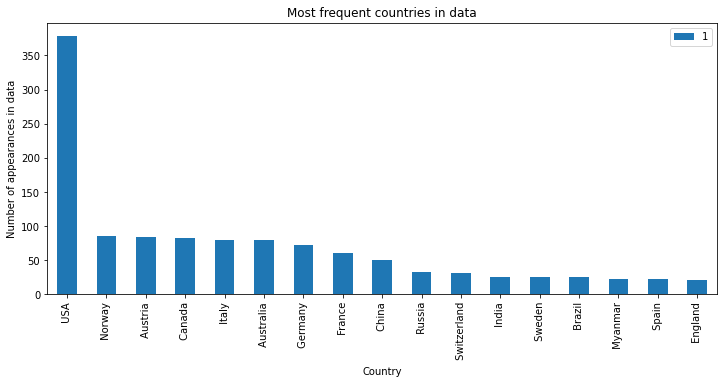

In [272]:
fig, ax = plt.subplots(figsize=(12,5))
ax = Country_df.plot(kind='bar',ax=ax)
ax.set_title("Most frequent countries in data")
ax.set_ylabel("Number of appearances in data")
ax.set_xlabel("Country")

Text(0.5, 0, 'Group Numbers (1-8)')

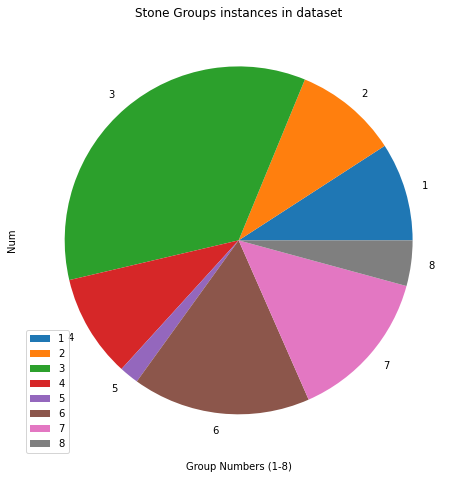

In [274]:
Stones_Groups_df = pd.DataFrame(index=[1,2,3,4,5,6,7,8], columns=["Num"])
for i in range(8):
    Stones_Groups_df["Num"][i+1] = 0
    
for ind in full_df.index:
    Stones_Groups_df["Num"][full_df["Group_Label"][ind]] = Stones_Groups_df["Num"][full_df["Group_Label"][ind]] + 1

Stones_Groups_df
fig, ax = plt.subplots(figsize=(10,8))
ax = Stones_Groups_df.plot(kind='pie',y="Num",ax=ax)
ax.set_title("Stone Groups instances in dataset")
ax.set_xlabel("Group Numbers (1-8)")

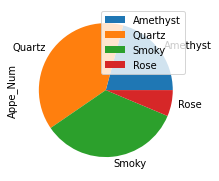

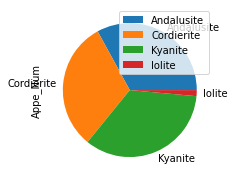

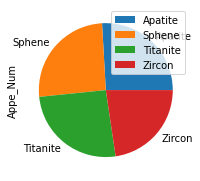

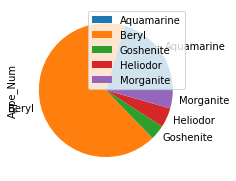

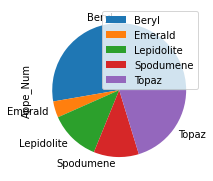

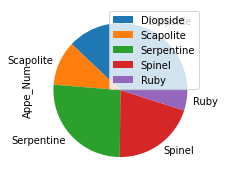

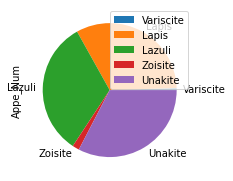

In [408]:
def make_group_df(stones):
    stones_list = []
    stones_appear_num = []
    for stone in stones.split():
        stone = re.sub('[^a-zA-Z ]+', '', stone)
        stones_list.append(stone)
        if(stone=="Opalize" or stone=="wood"):continue
        for col in Stones_appear.columns:
            if(col==stone):
                stones_appear_num.append(Stones_appear[col][0])
    Stones_df = pd.DataFrame(index=stones_list)
    Stones_df['Appe_Num'] = stones_appear_num
    return Stones_df

for i in range(7):
    ind = str(i+1)
    group_1 = make_group_df(Group_dict_df[ind][0])
    fig1, ax=plt.subplots(figsize=(3,5))
    ax = group_1.plot(kind='pie',y="Appe_Num",ax=ax)